In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
vals = [json.loads(line) for line in open('results/bot_results_new_style.txt')]
df = pd.DataFrame(vals)

df = df.assign(
    guesser = lambda dataframe: dataframe['guesser'].map(lambda guesser: guesser[guesser.index('.')+1:-2]),
    codemaster = lambda dataframe: dataframe['codemaster'].map(lambda codemaster: codemaster[codemaster.index('.')+1:-2])

).drop('cm_kwargs', axis=1).drop('g_kwargs', axis=1).drop('game_name',axis=1)
print("Average turns for 8 tiles: ",df['total_turns'].mean())

df

Average turns for 8 tiles:  19.113636363636363


,total_turns,R,B,C,A,codemaster,guesser,seed,time_s
0,25,2,0,0,1,codemaster_wn_lin.AICodemaster,guesser_w2vglove.AIGuesser,1.653947e+09,1.653947e+09
1,8,8,0,0,0,codemaster_w2vglove_05.AICodemaster,guesser_glove.AIGuesser,1.653947e+09,1.653947e+09
2,8,8,0,0,0,codemaster_glove_05.AICodemaster,vector_guesser.VectorGuesser,1.653947e+09,1.653947e+09
3,8,8,0,0,0,codemaster_wn_lin.AICodemaster,guesser_wn_jcn.AIGuesser,1.653947e+09,1.653947e+09
4,25,7,6,9,1,codemaster_glove_05.AICodemaster,guesser_wn_jcn.AIGuesser,1.653947e+09,1.653947e+09
...,...,...,...,...,...,...,...,...,...
127,25,5,4,8,1,codemaster_random.AICodemaster,vector_guesser.VectorGuesser,1.653970e+09,1.653970e+09
128,25,4,2,3,1,codemaster_w2vglove_05.AICodemaster,guesser_wn_wup.AIGuesser,1.653970e+09,1.653970e+09
129,25,6,3,3,1,codemaster_w2v_05.AICodemaster,guesser_wn_lch.AIGuesser,1.653972e+09,1.653972e+09
130,25,5,4,7,1,codemaster_random.AICodemaster,guesser_wn_lin.AIGuesser,1.653972e+09,1.653972e+09


In [3]:
df.groupby('guesser')['total_turns'].mean()

guesser
guesser_glove.AIGuesser         13.416667
guesser_random.AIGuesser        25.000000
guesser_w2v.AIGuesser           20.100000
guesser_w2vglove.AIGuesser      13.083333
guesser_wn_jcn.AIGuesser        20.363636
guesser_wn_lch.AIGuesser        21.153846
guesser_wn_lin.AIGuesser        21.181818
guesser_wn_path.AIGuesser       21.153846
guesser_wn_res.AIGuesser        21.000000
guesser_wn_wup.AIGuesser        20.000000
vector_guesser.VectorGuesser    14.071429
Name: total_turns, dtype: float64

In [4]:
df.groupby('codemaster')['total_turns'].mean()

codemaster
codemaster.HumanCodemaster             20.000000
codemaster_glove_05.AICodemaster       18.310345
codemaster_glove_07.AICodemaster        9.000000
codemaster_random.AICodemaster         24.120000
codemaster_w2v_05.AICodemaster         18.384615
codemaster_w2vglove_05.AICodemaster    18.153846
codemaster_wn_lin.AICodemaster         16.818182
Name: total_turns, dtype: float64

<AxesSubplot:xlabel='codemaster'>

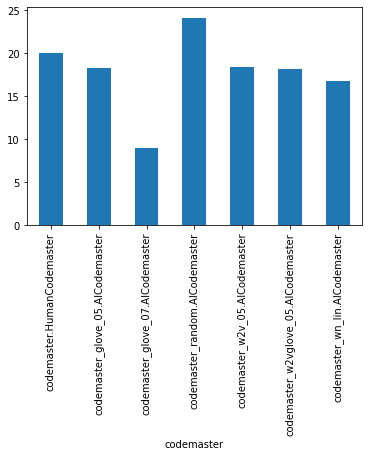

In [5]:
df.groupby('codemaster')['total_turns'].mean().plot.bar(x='codemaster', y='total_turns', rot=90)


<AxesSubplot:xlabel='guesser'>

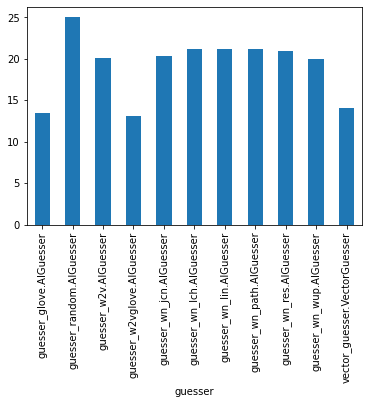

In [6]:
df.groupby('guesser')['total_turns'].mean().plot.bar(x='guesser', y='total_turns', rot=90)
